# Lectura de imágenes

En este notebook veremos como introducir imágenes a nuestra red neuronal.


### Dataset

Existen multiples formas para hacerlo, pero en este tutorial utilizaremos la función *dataset.ImageFolder* incorporada en el paquete *torchvision*. La forma rápida de leer un conjunto de imágenes es

```python
dataset = datasets.ImageFolder('directorio/', transform=transformacion)
```

la función *ImageFolder* espera que dentro del directorio los archivos esté organizados por folderes, donde cada folder contiene las imagenes de una clase en específico.

En este ejemplo usaré una base de datos propia que contiene dos clases, cactus y no_cactus. La base de datos tiene dos carpetas con los nombres *cactus* y *no_cactus*.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/irvingvasquez/practicas_pytorch/blob/master/07_lectura_de_imagenes.ipynb)


In [34]:
# cargamos paquetes
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

El conjunto de datos que usaremos será el de cactus

In [35]:
# para linux
#!wget https://jivg.org/wp-content/uploads/2024/07/cactus_course_dataset.zip

# para windows
!curl -o cactus_course_dataset.zip https://jivg.org/wp-content/uploads/2024/07/cactus_course_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  8 52.2M    8 4427k    0     0  3665k      0  0:00:14  0:00:01  0:00:13 3668k
 13 52.2M   13 6971k    0     0  3148k      0  0:00:17  0:00:02  0:00:15 3150k
 17 52.2M   17 9307k    0     0  2776k      0  0:00:19  0:00:03  0:00:16 2777k
 22 52.2M   22 11.6M    0     0  2838k      0  0:00:18  0:00:04  0:00:14 2839k
 27 52.2M   27 14.1M    0     0  2773k      0  0:00:19  0:00:05  0:00:14 2887k
 31 52.2M   31 16.6M    0     0  2729k      0  0:00:19  0:00:06  0:00:13 2505k
 36 52.2M   36 19.0M    0     0  2700k      0  0:00:19  0:00:07  0:00:12 2501k
 41 52.2M   41 21.4M    0     0  2674k      0  0:00:20  0:00:08  0:00:12 2603k
 45 52.2M   45 23.8M    0     0  2654k      0  0:00

In [36]:
# Para linux
#!unzip cactus_course_dataset.zip

# Para windows
import zipfile

with zipfile.ZipFile("cactus_course_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("cactus_dataset")

### Transformaciones

Usualmente las imagenes que leas estarán en un tamaño diferente al que necesitas para la red, asi que es necesario convertirlas a un formato adecuado, además será necesario convertirlas a tensores de pytorch. Todo esto lo podemos hacer con la función *transforms.Compose()*, en la cual podemos apilar las transformaciones necesarias. Por ejemplo,

```python
transforms = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

```


In [37]:
# directorio de la carpeta
directory = 'cactus_dataset/cactus_course_dataset/'

# aplicaré una serie de transformaciones
# 1. escalar las imágenes a 32 x 32 pixeles
# 2. convertir a tensores
common_transforms  = transforms.Compose([transforms.Resize(32),
                               transforms.CenterCrop(32),
                               transforms.ToTensor()])

train_data = datasets.ImageFolder(f'{directory}/training_set', transform=common_transforms)
validation_data = datasets.ImageFolder(f'{directory}/validation_set', transform=common_transforms)


### Data Loader

Image folder se encarga de las imágenes, sin embargo todavía es necesario otro objeto, el *DataLoader* quien se encarga de leer los ejemplos por lotes (batches) junto con su correspondiente etiqueta. En el objeto *DataLoader* puedes especificar diversos parametros como el tamaño del lote si los datos son mezclados (*suffled*) despúes de cada época, entre otras opciones. Por ejemplo,

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

Para iterar sobre los datos podemos hacer:

```python
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```

In [38]:
#crear el objeto dataloader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=32, shuffle=False)

tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


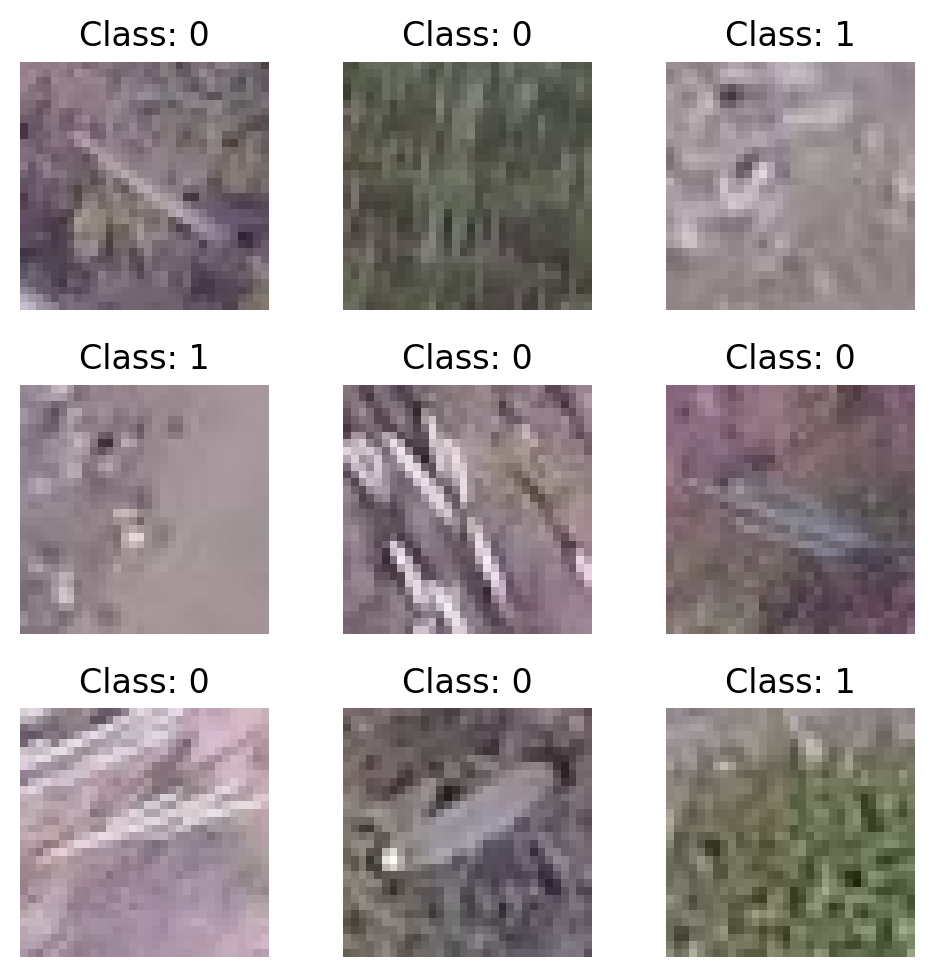

In [39]:
# Run this to test your data loader
images, labels = next(iter(train_loader))

fig, axes = plt.subplots(3, 3, figsize=(5, 5))
axes = axes.flatten()

for i in range(9):
    img = images[i]
    label = labels[i]
    print(label)
    helper.imshow(img, ax=axes[i], normalize=False)
    axes[i].set_title(f'Class: {label}')

plt.tight_layout()